# Conjunto de Mandelbrot - Processamento paralelo na resolução do fractal

Bacharelado em Ciência da Computação - Arquiteturas Paralelas e Distribuídas\
Lucas Breur, 06-2021

## Objetivo

O fractal de Mandelbrot é um conjunto de pontos no plano complexo definido de forma recursiva. O objetivo deste trabalho é a realização de experimentos para avaliação e comparação do tempo de processamento deste problema através de quatro diferentes implementações, sendo estas:

- Sequencial Python
- Sequencial C
- Paralelo OpenMP
- Paralelo CUDA

## Desenvolvimento

O conjunto é definido de acordo com a seguinte fórmula:

\begin{equation}
z_0 = 0\\
z_{k+1} = z_k^2 + c
\end{equation}

onde $z_{k+1}$ é a ${k+1}$-ésima iteração do número complexo $z=a+bi$ e $c$ é um ponto no plano complexo. As
iteraçõoes continuam até que a magnitude de $z$ seja maior que 2 ou o número de iterações alcance um limite
arbitrário. A magnitude de $z$ é o tamanho do vetor dado por:

\begin{equation}
z_{length} = \sqrt{a^2 + b^2}
\end{equation}

### Sequencial em Python

Segue abaixo a implementação sequencial em Python:

```python
# Função que retorna valor de cor para um pixel do conjunto de Mandelbrot
def calc_pixel(real, imag):
    c = complex(real, imag)
    z = 0
    count = 0

    # Iterações continuam até que a magnitude de z seja maior que 2 ou o número de iterações alcance um limite arbitrário definido por MAX_I
    while abs(z) <= 2 and count < MAX_I:
        z = z * z + c   
        count += 1
    return count
```

### Sequencial em C

Segue abaixo a implementação sequencial em C:

```c
// Estrutura para definição de número complexo
typedef struct {
    float real;
    float imag;
} complex;

// Função que retorna valor de cor para um pixel do conjunto de Mandelbrot
int calc_pixel(complex c) {

    int count;
    complex z;

    float temp, lengthsq;

    z.real = 0; 
	z.imag = 0;
    count = 0;

	// Iterações continuam até que a magnitude de z seja maior que 2 ou o número de iterações alcance um limite arbitrário definido por MAX_I
    do {
        temp = z.real * z.real - z.imag * z.imag + c.real;
        z.imag = 2 * z.real * z.imag + c.imag;
        z.real = temp;
        lengthsq = z.real * z.real + z.imag * z.imag;
        count++;
    } while ((lengthsq < 4.0) && (count < MAX_I));
    
    return count;
}
```

### OpenMP

A implementação em OpenMP é realizada sobre o código sequencial em C. Para executar a paralelização utiliza-se o comando abaixo logo acima do primeio laço __for__:

```c
// Inicia o paralelismo para o loop for
    #pragma omp parallel for default(shared)\
                            private(z, y, color)\
                            num_threads(THREADS)\
                            schedule(static,1)\
```

Por padrão (__default__) as variáveis são definidas como compartilhadas (__shared__). Define-se $z$, $y$ e $color$ como privadas com o objetivo de impor o escopo local destas variáveis para cada __thread__.

A distribuição da carga de trabalho é definida por schedule(static, 1), onde as iterações são agrupadas (__chunks__) e estaticamente distribuídas para as __threads__.

Definimos o número de paralelizações através da constante __THREADS__.

### CUDA

### Visualização

Ao final do processamento é gerado como saída um arquivo .PNG representando o fractal de Mandelbrot. Existe uma diferença de gradiente entre as implementações em Python e C devido às diferentes bibliotecas utilizadas em cada linguagem e a subsequente definição dos __ranges__ de coloração. Em Python foi utilizada a biblioteca __pillow__ e em C a biblioteca __libpng__.

Mandelbrot Fractal in Python: pillow\
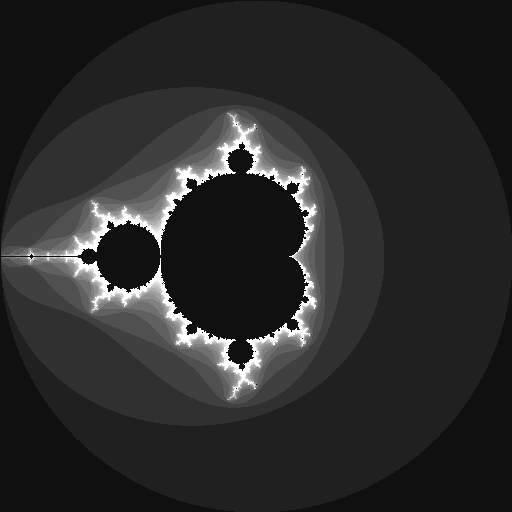

Mandelbrot Fractal in C: libpng\
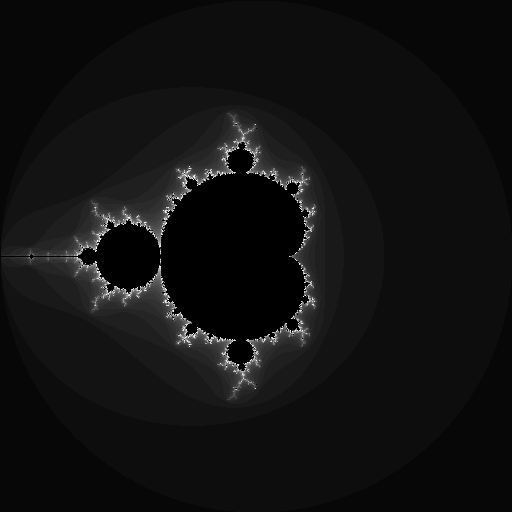

## Experimentos



Text(0, 0.5, 'Tempo de execução [s]')

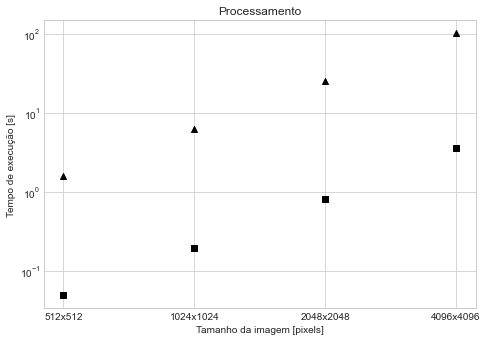

In [59]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
%matplotlib inline
plt.style.use('seaborn-whitegrid')

dt_py = pd.read_csv('exp-seq-py.csv')
dt_c = pd.read_csv('exp-seq-c.csv')
dt_mp = pd.read_csv('exp-openmp.csv')

x = [data.columns[0], dt_py.columns[1], dt_py.columns[2], dt_py.columns[3]]

y_py = [np.mean(dt_py.iloc[:,0]), 
     np.mean(dt_py.iloc[:,1]), 
     np.mean(dt_py.iloc[:,2]), 
     np.mean(dt_py.iloc[:,3])]

y_c = [np.mean(dt_c.iloc[:,0]), 
     np.mean(dt_c.iloc[:,1]), 
     np.mean(dt_c.iloc[:,2]), 
     np.mean(dt_c.iloc[:,3])]

y_mp = [np.mean(dt_mp.iloc[:,0]), 
     np.mean(dt_mp.iloc[:,1]), 
     np.mean(dt_mp.iloc[:,2]), 
     np.mean(dt_mp.iloc[:,3])]

std = [dt_c.iloc[:,0].std(), 
       dt_c.iloc[:,1].std(), 
       dt_c.iloc[:,2].std(), 
       dt_c.iloc[:,3].std()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.errorbar(x, y_c, yerr=std, fmt='.k');
ax.scatter(x,y_py, marker="^", color="black")
ax.scatter(x,y_c, marker="s", color="black")
# ax.scatter(x,y_mp, marker="x", color="black")
ax.set_yscale('log')
ax.set_title("Processamento")
ax.set_xlabel('Tamanho da imagem [pixels]')
ax.set_ylabel('Tempo de execução [s]')